# Question:1

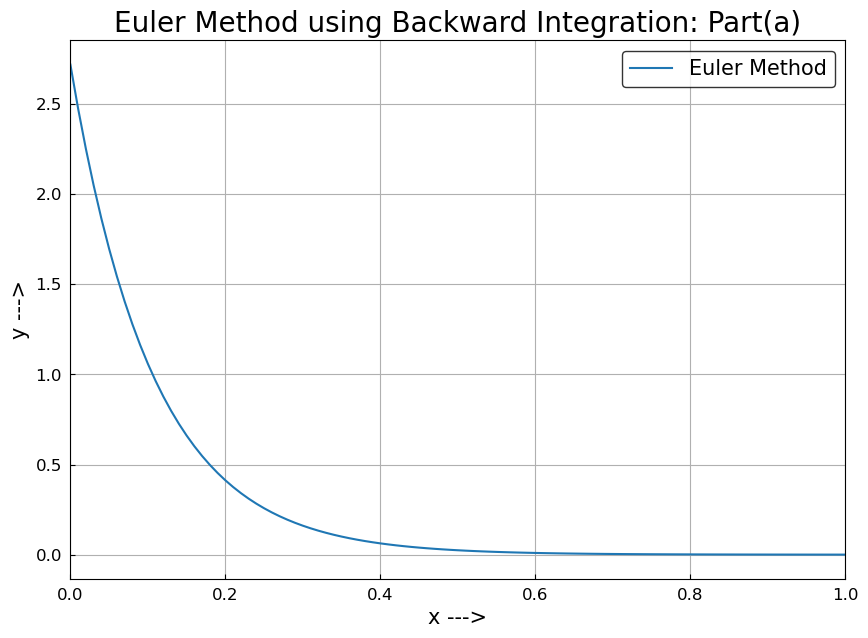

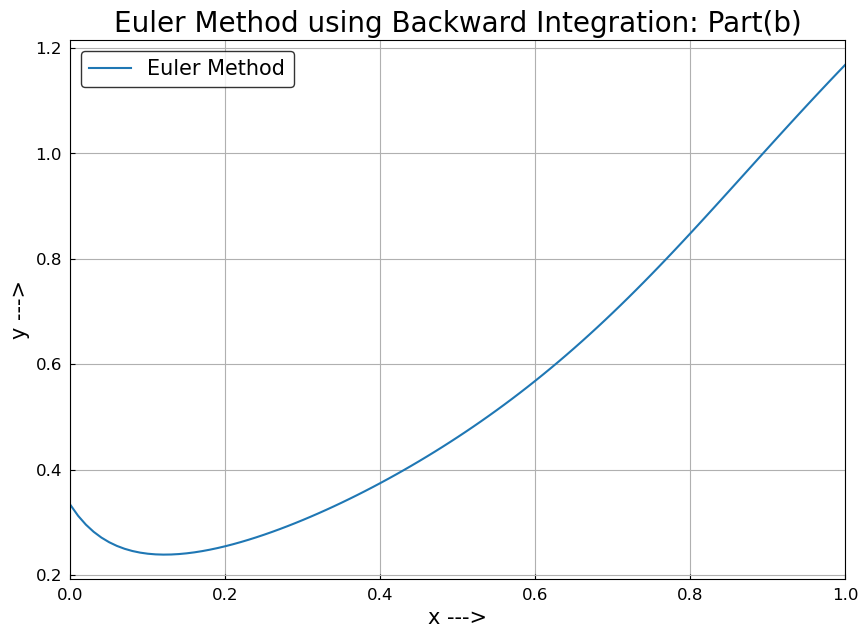

In [7]:
#Question:1

import numpy as np
import matplotlib.pyplot as plt

#Defining function for Euler's method using backward integration
def backward_euler(f, x0, y0, xf, h):
    steps = int((xf - x0) / h) + 1
    x = [x0 + i*h for i in range(steps)]                  #Defining the x-array
    y = [y0] * steps                                        #Initializing the y-array
    
    for i in range(1,steps):
        x[i] = x0 + i*h
        y[i] = y[i-1] + h*f(x[i], y[i-1])
        
    return x, y



#******************************************************(a)********************************************************

#Defining the function f(x,y) for first ODE
def f1(x, y):
    return -9*y

#Given initial conditions
x0 = 0
y0 = np.exp(1)
xf = 1
h = 0.01

#Solving the first ODE
x, y = backward_euler(f1, x0, y0, xf, h)

#Plotting the numerical solution of first ODE
plt.figure(0)
plt.plot(x, y, label='Euler Method')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Euler Method using Backward Integration: Part(a)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,1)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#******************************************************(b)********************************************************

#Defining the function f(x,y) for second ODE
def f2(x, y):
    return -20*((y - x)**2) + 2*x

#Given initial conditions
x0 = 0
y0 = 1/3
xf = 1
h = 0.01

#Solving the second ODE
x, y = backward_euler(f2, x0, y0, xf, h)

#Plotting the numerical solution of second ODE
plt.figure(1)
plt.plot(x, y, label='Euler Method')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Euler Method using Backward Integration: Part(b)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,1)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

# Question:2

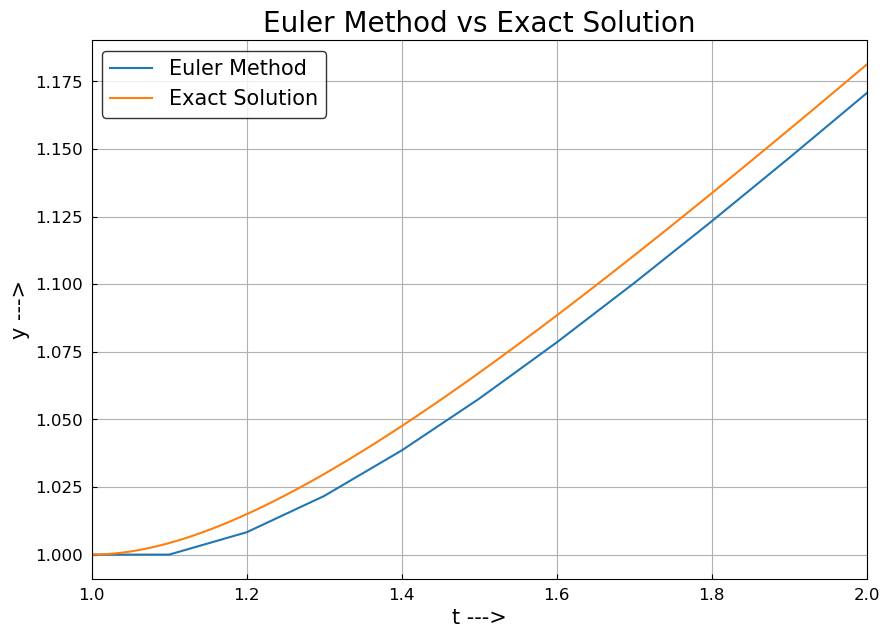

t values: [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
Absolute errors: [0.         0.00428173 0.00668785 0.00812422 0.00901919 0.00959416
 0.00997159 0.01022289 0.01039151 0.01050484 0.01058065]
Relative errors: [0.         0.00426347 0.00658933 0.00788902 0.00860992 0.00898951
 0.00916142 0.00920438 0.00916639 0.00907758 0.0089573 ]


In [36]:
#Question:2

import numpy as np
import matplotlib.pyplot as plt

#Defining function for Euler's method
def euler_method(f, t0, y0, h, steps):
    t_values = [t0]                   #initializing the t-array
    y_values = [y0]                   #initializing the y-array
    
    for _ in range(steps):
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h*f(t_values[-1], y_values[-1])
        t_values.append(t_next)
        y_values.append(y_next)
        
    return np.array(t_values), np.array(y_values)

#Defining the function f(t,y)
def f(t,y):
    return (y/t) - (y/t)**2

#Defining function for exact solution
def exact(t):
    return t/(1 + np.log(t))

#Data for plotting of exact solution
t_array = np.linspace(1,2,100)
y_array = exact(t_array)

#Given initial conditions and range for t
t0 = 1
tn = 2
y0 = 1

#Given step size
h=0.1

#Number of steps
steps = int((tn - t0)/h)

#Solving the ODE
t_values, y_values = euler_method(f, t0, y0, h, steps)

#Plotting the numerical solution vs the exact solution
plt.plot(t_values, y_values, label='Euler Method')
plt.plot(t_array, y_array, label='Exact Solution')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Euler Method vs Exact Solution',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(1,2)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

#Data for calculating point-wise errors
t = t_values
y = exact(t)

#Defining absolute and relative error arrays
abs_error = np.abs(np.subtract(y_values, y))
rel_error = np.abs(np.divide(abs_error, y))

#Printing the relative and absolute errors
print('t values:', t)
print('Absolute errors:', abs_error)
print('Relative errors:', rel_error)

# Question:3

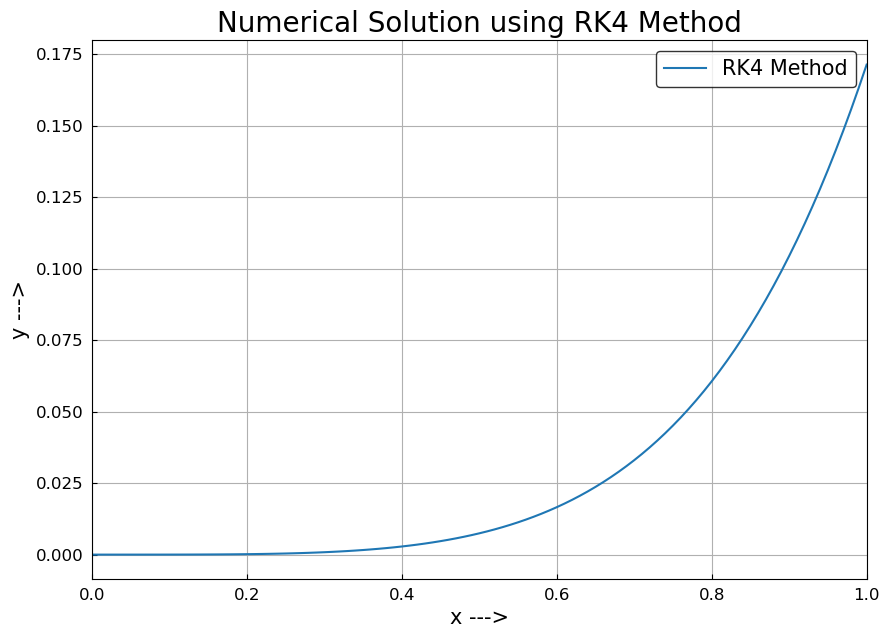

In [35]:
#Question:3

import numpy as np
import matplotlib.pyplot as plt

#Defining function for RK4 method
def rk4_method(f, y0, dy0, x0, xn, h):
    steps = int((xn - x0)/h)                           #Number of steps
    x_values = np.linspace(x0, xn, steps + 1)          #Defining x-array
    y_values = np.zeros(steps + 1)                     #Initializing y-array to all zeros 
    dy_values = np.zeros(steps + 1)                    #Initializing dy/dx-array to all zeros 
    
    y_values[0] = y0                                   #Input given initial value in the array
    dy_values[0] = dy0                                 #Input given initial value in the array

    for i in range(steps):                             #Starting the RK4 routine                        
        x = x_values[i]
        y = y_values[i]
        dy = dy_values[i]

        k1 = h * dy                                    
        l1 = h * f(x, y, dy)

        k2 = h * (dy + 0.5 * l1)
        l2 = h * f(x + 0.5 * h, y + 0.5 * k1, dy + 0.5 * l1)

        k3 = h * (dy + 0.5 * l2)
        l3 = h * f(x + 0.5 * h, y + 0.5 * k2, dy + 0.5 * l2)

        k4 = h * (dy + l3)
        l4 = h * f(x + h, y + k3, dy + l3)

        y_values[i+1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        dy_values[i+1] = dy + (l1 + 2*l2 + 2*l3 + l4) / 6

    return x_values, y_values, dy_values

#Defining the function f(x, y, dy/dx)
def f(x, y, dy):
    return 2*dy - y - x + (x*np.exp(x))

#Given initial conditions
y0 = 0
dy0 = 0
x0 = 0
xn = 1
h = 0.01

#Solving the ODE
x_values, y_values, dy_values = rk4_method(f, y0, dy0, x0, xn, h)

#Plotting the numerical solution
plt.plot(x_values, y_values, label='RK4 Method')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution using RK4 Method',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,1)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

# Question:6

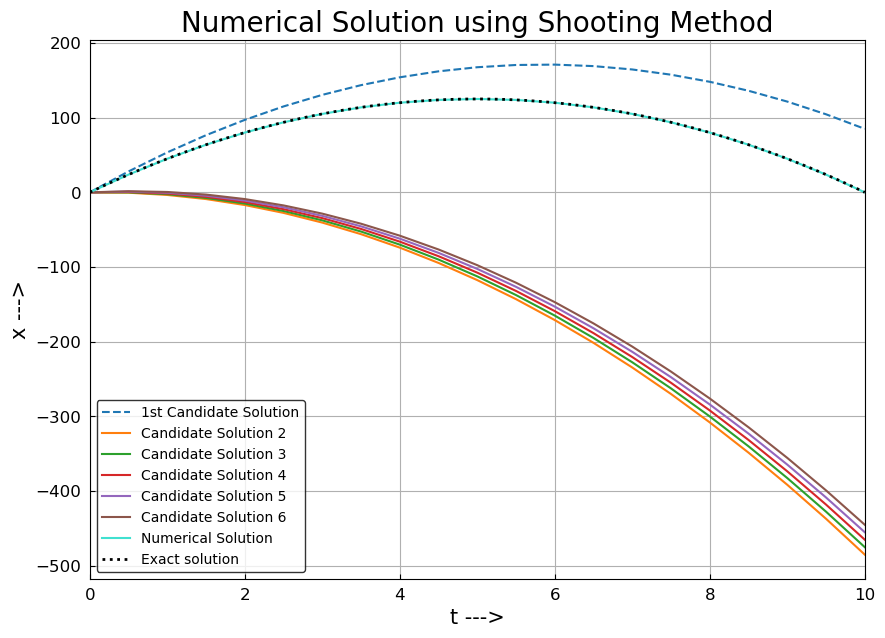

In [87]:
#Question:6

import numpy as np
import matplotlib.pyplot as plt

g=10

#Writing given 2nd order ODE as two coupled 1st order ODEs
def f1(t,x,y):
    return y
def f2(t,x,y):
    return -g

#Defining function for Euler's method
def euler_method(f1, f2, t0, x0, y0, h, tf):
    t_values=[t0]                                   #Initializing the t-array
    y_values=[y0]                                   #Initializing the y-array
    x_values=[x0]                                   #Initializing the x-array
    
    while t_values[-1] < tf:  
        t = t_values[-1]
        y = y_values[-1]
        x = x_values[-1]
        x_next = x + h*f1(t, x, y)
        y_next = y + h*f2(t, x, y)
        t_values.append(t + h)
        x_values.append(x_next)
        y_values.append(y_next)
    return t_values, x_values, y_values

#Defining function for shooting method
def shooting_method(t0, tf, x0, x1, y0, tol=1e-6, steps=100):
    curves = []
    for i in range(steps):
        t, x, _ = euler_method(f1, f2, t0, x0, y0, 0.5, tf)
        curves.append(x)
        res = x[-1] - x1
        if abs(res) < tol:
            return curves, t, x
        y0 -= res / 10 
    print("The algorithm didn't converge within maximum iterations.")
    return None, None, None

#Given boundary conditions
t0 = 0
tf = 10
x1 = 0
y0 = 56
x0 = 0

#Solution using shooting method
curves, t, sol = shooting_method(t0, tf, x0, x1, y0)

#Defining function for exact solution
def exact_sol(t):
    return -5* t**2 + 50*t

#Generating data for exact solution
t_values = np.linspace(0, 10, 100)
exact_values = exact_sol(t_values)

#Plotting the first candidate solution
n = len(curves)
for i in range(n-1):
    plt.plot(t, curves[i], linestyle='--', label=f'{i+1}st Candidate Solution')

#Plotting other candidate solutions
for i in range(5):
    y0 = i - 1
    t, x, _ = euler_method(f1, f2, t0, x0, y0, 0.5, tf)
    plt.plot(t, x, label=f'Candidate Solution {i+2}' )
    
#Plot the numerical solution
plt.plot(t, sol, label='Numerical Solution', color='turquoise')

#Plotting the exact solution
plt.plot(t_values, exact_values,linestyle=':', label='Exact solution',color='black', linewidth = 2)

#Setting plot parameters
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('x --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution using Shooting Method',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,10)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=10)
plt.show()

# Question:7

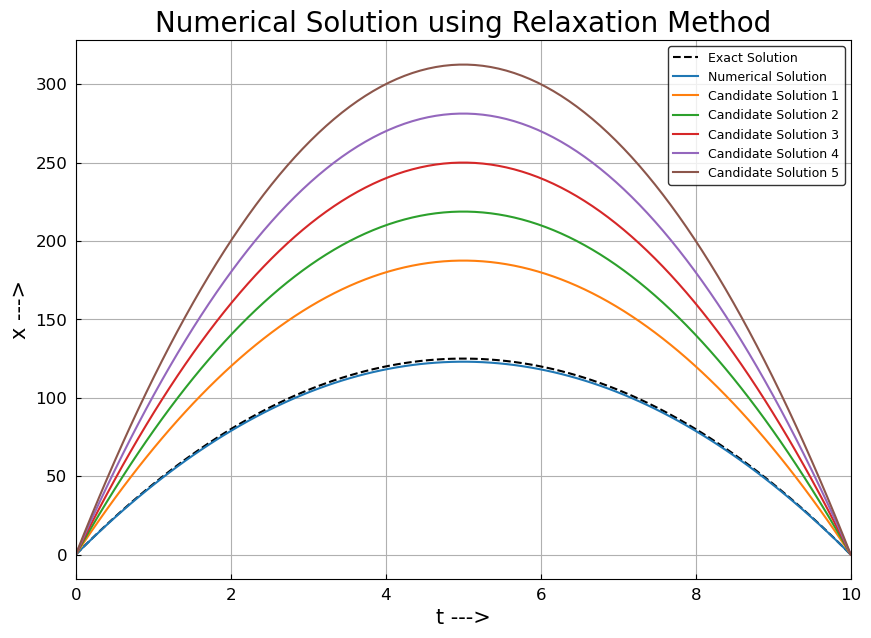

In [86]:
#Question:7

import numpy as np
import matplotlib.pyplot as plt

#Defining function for relaxation method
def relaxation_method(tf, g, n=100, tol=1e-3):
    h = tf / (n - 1)  
    x = np.zeros(n)                              #Initializing the x-array 
    x[-1] = 0                                    #Given boundary condition   
    while True:
        x_new = np.zeros(n)
        x_new[0] = 0                             #Given boundary condition
        
        for i in range(1, n - 1):
            x_new[i] = 0.5 * (x[i - 1] + x[i + 1] + h**2 * g)
        
        if np.max(np.abs(x_new - x)) < tol:
            break
        
        x = x_new  
    return x

#Given values 
tf = 10
g = 10

#Solution using relaxation method
x_num = relaxation_method(tf, g)
t = np.linspace(0, tf, len(x_num))

#Defining function for exact solution
def exact_sol(t):
    return (g / 2) * t * (tf - t)

#Generating candidate solutions
candidate_slopes = np.linspace(1.5, 2.5, 5)
x_candidate = [exact_sol(t) * slope for slope in candidate_slopes]

#Plotting exact solution
plt.plot(t, exact_sol(t), label='Exact Solution', linestyle='--', color='black')

#Plotting numerical solution
plt.plot(t, x_num, label='Numerical Solution')

#Plotting candidate solutions
for i, candidate in enumerate(x_candidate):
    plt.plot(t, candidate, label=f'Candidate Solution {i+1}')

#Setting plot parameters
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('x --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution using Relaxation Method',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,10)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=9,loc="upper right")
plt.show()

# Question:8

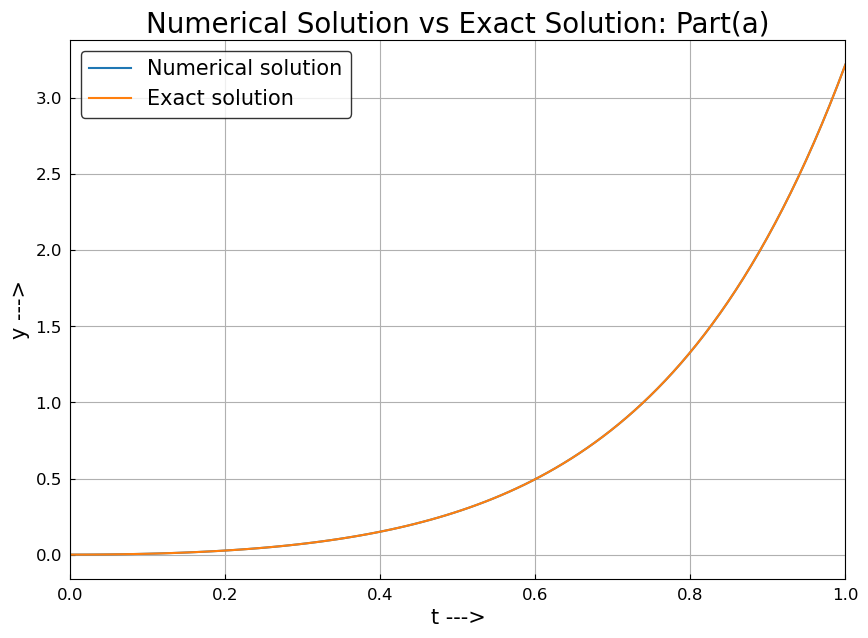

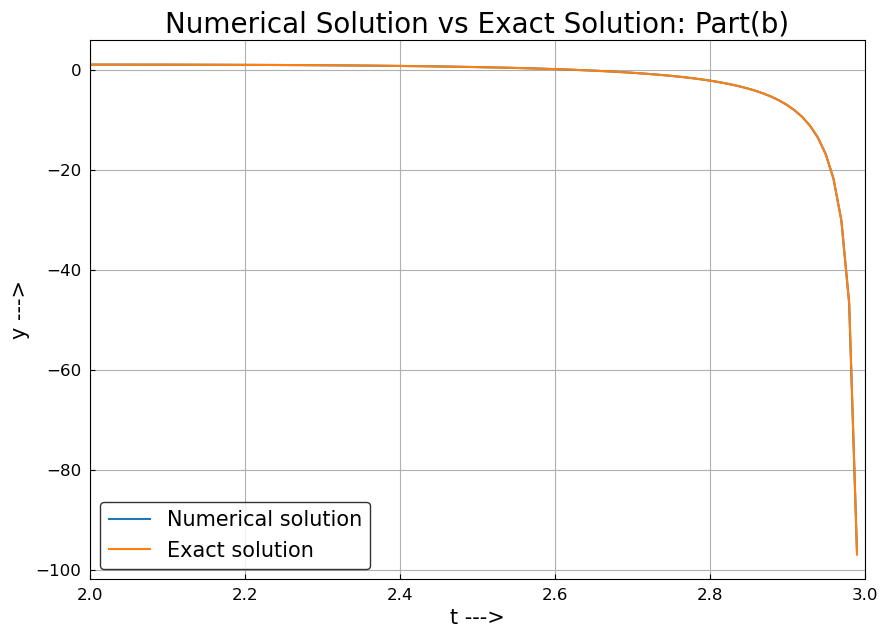

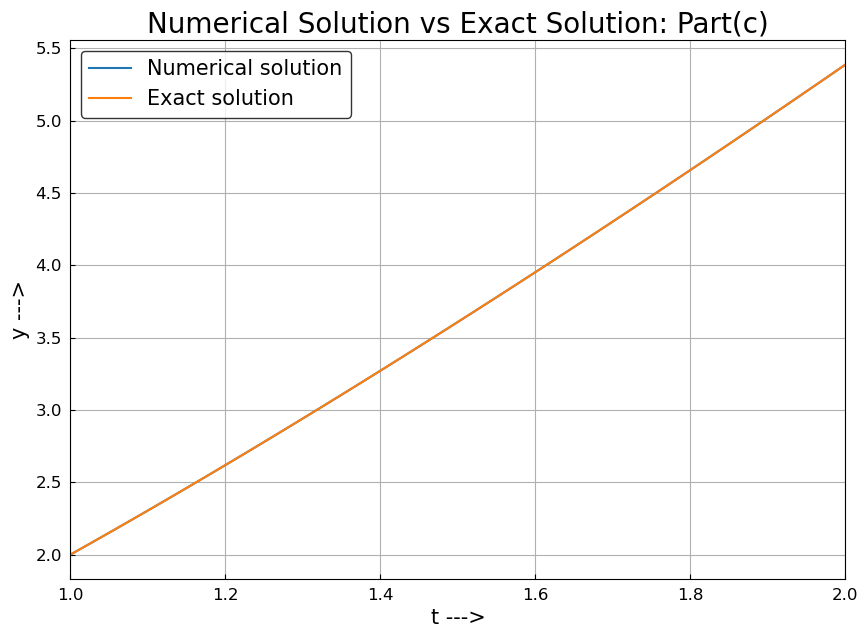

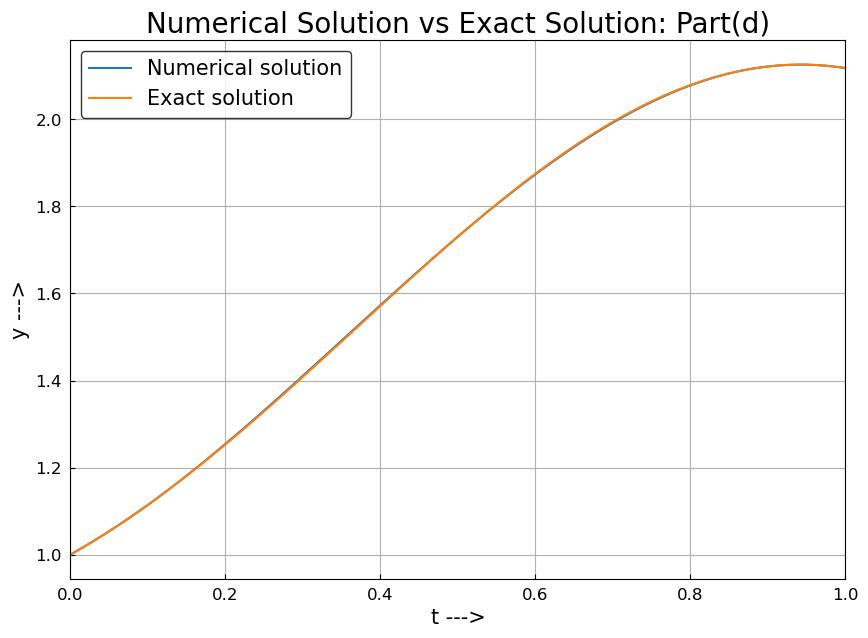

In [45]:
#Question:8

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


#**************************************************(a)******************************************************

#Defining function f(t,y) for first ODE 
def f1(t, y):
    return t*np.exp(3*t) - 2*y

#Defining range of t and initial value
t_range = (0, 1)
y0 = 0

#Solving the first ODE using solve_ivp
sol1 = solve_ivp(f1, t_range , [y0] , t_eval=np.linspace(0,1,100))

#Defining function for exact solution
def exact(t):
    return (np.exp(-2*t)*( 1 - np.exp(5*t) + 5*t*np.exp(5*t) ))/25

#Data for plotting the exact solution
t_exact = np.linspace(0,1,100)
y_exact = exact(t_exact)

#Plotting the numerical solution vs the exact solution
plt.figure(0)
plt.plot(sol1.t,sol1.y[0], label='Numerical solution')
plt.plot(t_exact, y_exact, label='Exact solution')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(a)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,1)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#**************************************************(b)******************************************************

#Defining function f(t,y) for second ODE 
def f2(t, y):
    return 1 - (t -y)**2
#Defining range of t and initial value
t_range = (2, 3)
y0 = 1

#Solving the first ODE using solve_ivp
sol2 = solve_ivp(f2, t_range , [y0] , t_eval=np.linspace(2,3,100))

#Defining function for exact solution
def exact(t):
    return (1 - 3*t + t**2)/(t - 3)

#Data for plotting the exact solution
t_exact = np.linspace(2,2.99,100)
y_exact = exact(t_exact)

#Plotting the numerical solution vs the exact solution
plt.figure(1)
plt.plot(sol2.t,sol2.y[0], label='Numerical solution')
plt.plot(t_exact, y_exact, label='Exact solution')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(b)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(2,3)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#**************************************************(c)******************************************************

#Defining function f(t,y) for third ODE 
def f3(t, y):
    return 1 + y/t
#Defining range of t and initial value
t_range = (1, 2)
y0 = 2

#Solving the first ODE using solve_ivp
sol3 = solve_ivp(f3, t_range , [y0] , t_eval=np.linspace(1,2,100))

#Defining function for exact solution
def exact(t):
    return 2*t + t*np.log(t)

#Data for plotting the exact solution
t_exact = np.linspace(1,2,100)
y_exact = exact(t_exact)

#Plotting the numerical solution vs the exact solution
plt.figure(2)
plt.plot(sol3.t,sol3.y[0], label='Numerical solution')
plt.plot(t_exact, y_exact, label='Exact solution')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(c)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(1,2)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#**************************************************(d)******************************************************

#Defining function f(t,y) for fourth ODE 
def f4(t, y):
    return np.cos(2*t) + np.sin(3*t)
#Defining range of t and initial value
t_range = (0, 1)
y0 = 1

#Solving the first ODE using solve_ivp
sol4 = solve_ivp(f4, t_range , [y0] , t_eval=np.linspace(0,1,100))

#Defining function for exact solution
def exact(t):
    return (8 - 2*np.cos(3*t) + 3*np.sin(2*t))/6

#Data for plotting the exact solution
t_exact = np.linspace(0,1,100)
y_exact = exact(t_exact)

#Plotting the numerical solution vs the exact solution
plt.figure(3)
plt.plot(sol4.t,sol4.y[0], label='Numerical solution')
plt.plot(t_exact, y_exact, label='Exact solution')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(d)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,1)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

# Question:9

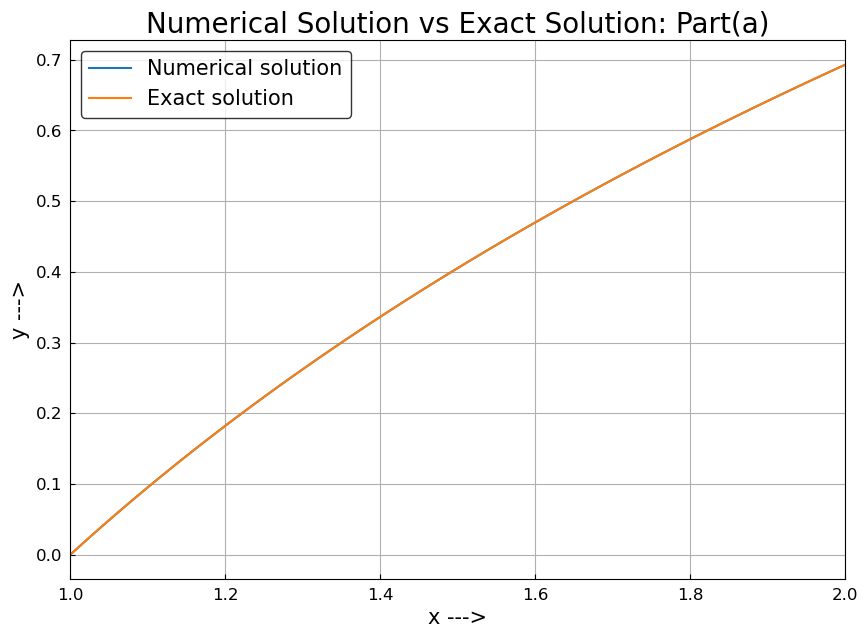

/tmp/ipykernel_3903/2591740009.py:63: RuntimeWarning: divide by zero encountered in log
  dydx2 = y[1]*np.cos(x) - y[0]*np.log(y[0])         #Defining d2y/dx2
/tmp/ipykernel_3903/2591740009.py:63: RuntimeWarning: invalid value encountered in multiply
  dydx2 = y[1]*np.cos(x) - y[0]*np.log(y[0])         #Defining d2y/dx2


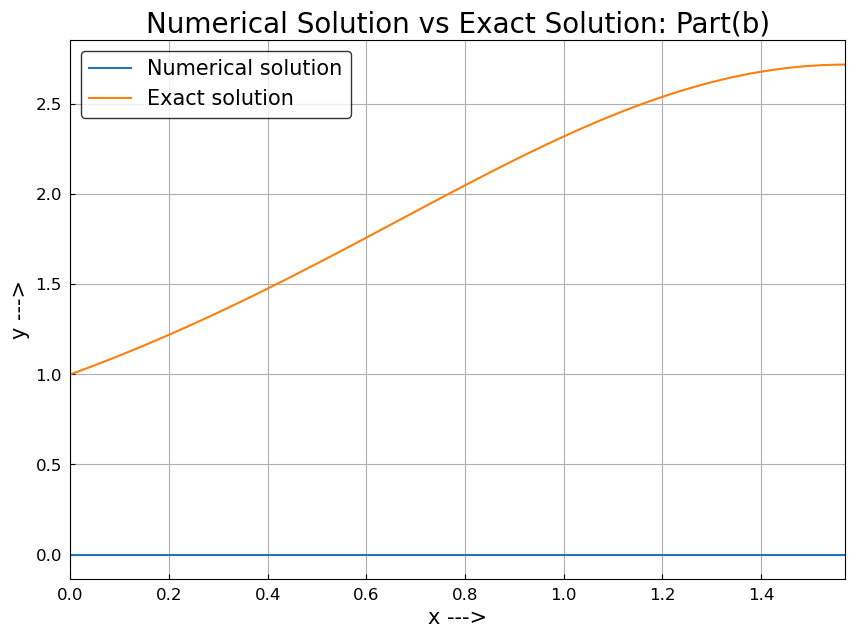

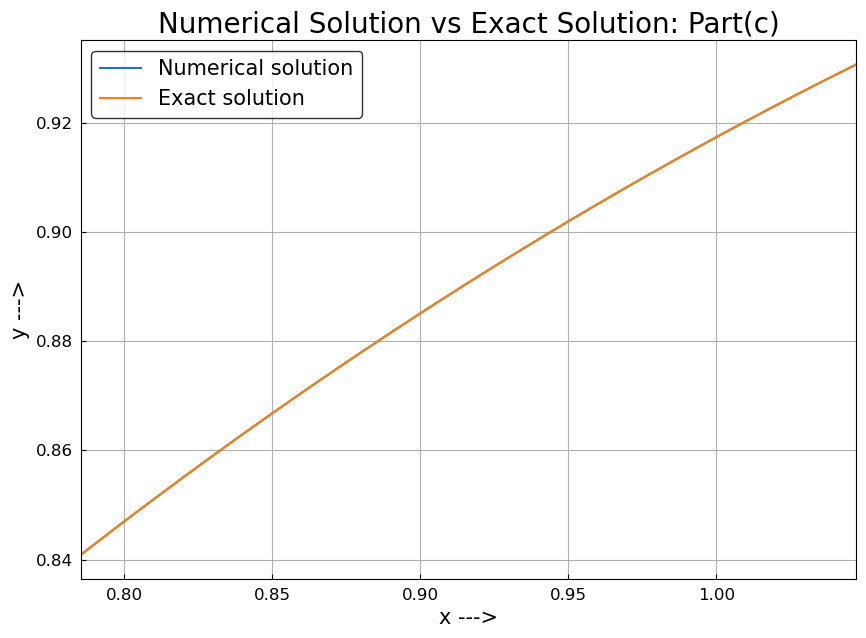

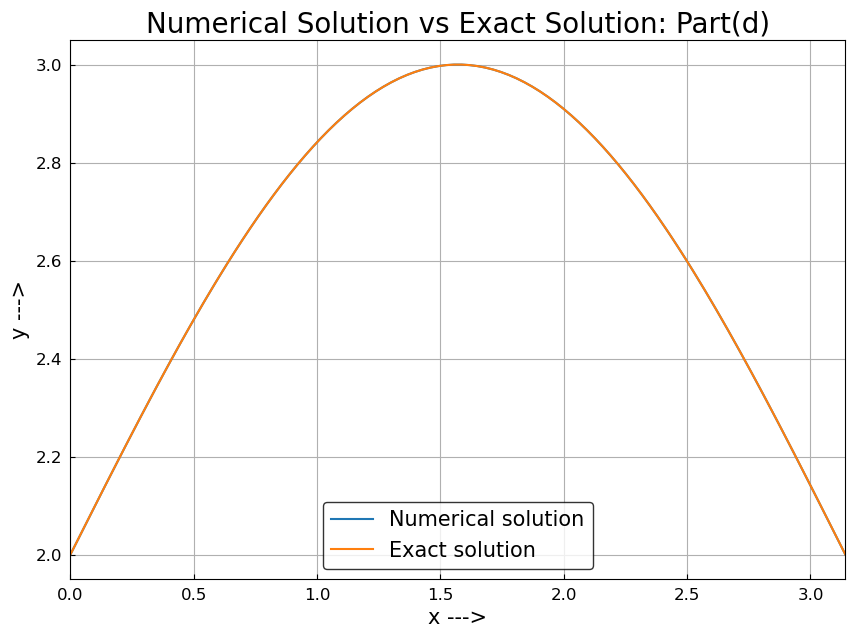

In [7]:
#Question:9

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp


#**************************************************(a)******************************************************

#Defining function for first ODE
def f1(x, y):
    dydx1 = y[1]                       #Defining dy/dx
    dydx2 = -np.exp(-2*y[0])           #Defining d2y/dx2
    return np.vstack((dydx1, dydx2))

#Given boundary conditions
def bc1(ya, yb):
    return np.array([ya[0] - 0, yb[0] - np.log(2)])

#Given x-range
x0 = 1
xf = 2
x_range1 = np.linspace(x0, xf, 100)

#Initial guess solution
y_guess1 = np.zeros((2, x_range1.size))

#Solving the ODE
sol1 = solve_bvp(f1, bc1, x_range1, y_guess1)

#Defining function for exact solution
def exact(x):
    return np.log(x)

#Data for plotting the exact solution
x_exact = np.linspace(1,2,100)
y_exact = exact(x_exact)

#Plotting the numerical solution vs the exact solution
plt.figure(0)
plt.plot(sol1.x,sol1.y[0], label='Numerical solution')
plt.plot(x_exact, y_exact, label='Exact solution')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(a)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(1,2)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#**************************************************(b)******************************************************

#Defining function for second ODE
def f2(x, y):
    dydx1 = y[1]                                       #Defining dy/dx
    dydx2 = y[1]*np.cos(x) - y[0]*np.log(y[0])         #Defining d2y/dx2
    return np.vstack((dydx1, dydx2))

#Given boundary conditions
def bc2(ya, yb):
    return np.array([ya[0] - 1, yb[0] - np.exp(1)])

#Given x-range
x0 = 0
xf = (np.pi)/2
x_range2 = np.linspace(x0, xf, 100)

#Initial guess solution
y_guess2 = np.zeros((2, x_range2.size))

#Solving the ODE
sol2 = solve_bvp(f2, bc2, x_range2, y_guess2)

#Defining function for exact solution
def exact(x):
    return np.exp(np.sin(x))

#Data for plotting the exact solution
x_exact = np.linspace(0,np.pi/2,100)
y_exact = exact(x_exact)


#Plotting the numerical solution vs the exact solution
plt.figure(1)
plt.plot(sol2.x,sol2.y[0], label='Numerical solution')
plt.plot(x_exact, y_exact, label='Exact solution')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(b)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,np.pi/2)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#**************************************************(c)******************************************************

#Defining function for third ODE
def f3(x, y):
    dydx1 = y[1]                                                 #Defining dy/dx
    dydx2 = -( 2*((y[1])**3) + y[0]*y[0]*y[1] )/(np.cos(x))      #Defining d2y/dx2
    return np.vstack((dydx1, dydx2))

#Given boundary conditions
def bc3(ya, yb):
    return np.array([ya[0] - 2**(-1/4), yb[0] - ((12)**(1/4))/2])

#Given x-range
x0 = (np.pi)/4
xf = (np.pi)/3
x_range3 = np.linspace(x0, xf, 100)

#Initial guess solution
y_guess3 = np.zeros((2, x_range3.size))

#Solving the ODE
sol3 = solve_bvp(f3, bc3, x_range3, y_guess3)

#Defining function for exact solution
def exact(x):
    return np.sqrt(np.sin(x))

#Data for plotting the exact solution
x_exact = np.linspace(np.pi/4,np.pi/3,100)
y_exact = exact(x_exact)


#Plotting the numerical solution vs the exact solution
plt.figure(2)
plt.plot(sol3.x,sol3.y[0], label='Numerical solution')
plt.plot(x_exact, y_exact, label='Exact solution')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(c)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(np.pi/4,np.pi/3)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()



#**************************************************(d)******************************************************

#Defining function for fourth ODE
def f4(x, y):
    dydx1 = y[1]                                                 #Defining dy/dx
    dydx2 = 1/2 - (y[1]*y[1])/2 - (y[0]*np.sin(x))/2                #Defining d2y/dx2
    return np.vstack((dydx1, dydx2))

#Given boundary conditions
def bc4(ya, yb):
    return np.array([ya[0] - 2, yb[0] - 2])

#Given x-range
x0 = 0
xf = np.pi
x_range4 = np.linspace(x0, xf, 100)

#Initial guess solution
y_guess4 = np.zeros((2, x_range4.size))

#Solving the ODE
sol4 = solve_bvp(f4, bc4, x_range4, y_guess4)

#Defining function for exact solution
def exact(x):
    return 2 + np.sin(x)

#Data for plotting the exact solution
x_exact = np.linspace(0,np.pi,100)
y_exact = exact(x_exact)


#Plotting the numerical solution vs the exact solution
plt.figure(3)
plt.plot(sol4.x,sol4.y[0], label='Numerical solution')
plt.plot(x_exact, y_exact, label='Exact solution')
plt.xlabel('x --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Numerical Solution vs Exact Solution: Part(d)',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,np.pi)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

# Question:10

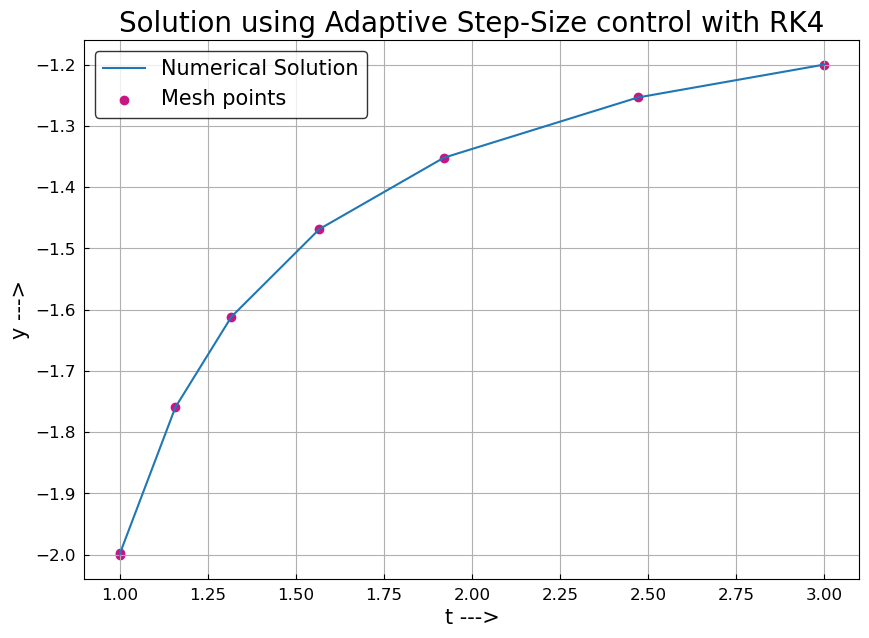

In [99]:
#Question:10

import numpy as np
import matplotlib.pyplot as plt
from math import *

#Defining function for RK4 method
def rk4_method(f,t,y,h):
    k1 = h*f(t,y)
    k2 = h*f(t + h/2, y + k1/2)
    k3 = h*f(t + h/2, y + k2/2)
    k4 = h*f(t + h, y + k3)
    return y+(k1 + 2*k2 + 2*k3 +k4)/6

#Defining function f(t,y) for given ODE
def f(t,y):
    return (y**2+y)/t

#Given initial condition and t-range
t0 = 1
tf = 3
y0 = -2
y = [y0]                                     #Initializing the y-array
t = [t0]                                   #Initializing the t-array

#Step-size
h = 0.001

a = 0
#Implementing the adaptive step-size control with RK4
while(a==0):
    a = 1
    if (t[-1]+h < tf):
        a  = a-1
        y1 = rk4_method(f,t[-1],y[-1],h)
        y.append(y1)
        t.append(t[-1]+h)
        y1 = rk4_method(f,t[-1],y[-1],h)
        y2 = rk4_method(f,t[-2],y[-2],2*h)
        rho = 1
        if (np.abs(y1-y2)!=0):
            rho = (10**(-4)*h*30/np.abs(y1-y2))**(0.25)
        h = h*rho


h = tf - t[-1]
y.append(rk4_method(f,t[-1],y[-1],h))
t.append(tf)

#Plotting the sumerical solution and mesh-points
plt.plot(t,y,label='Numerical Solution')
plt.scatter(t,y, label='Mesh points', color ='mediumvioletred')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Solution using Adaptive Step-Size control with RK4',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

# Question:11

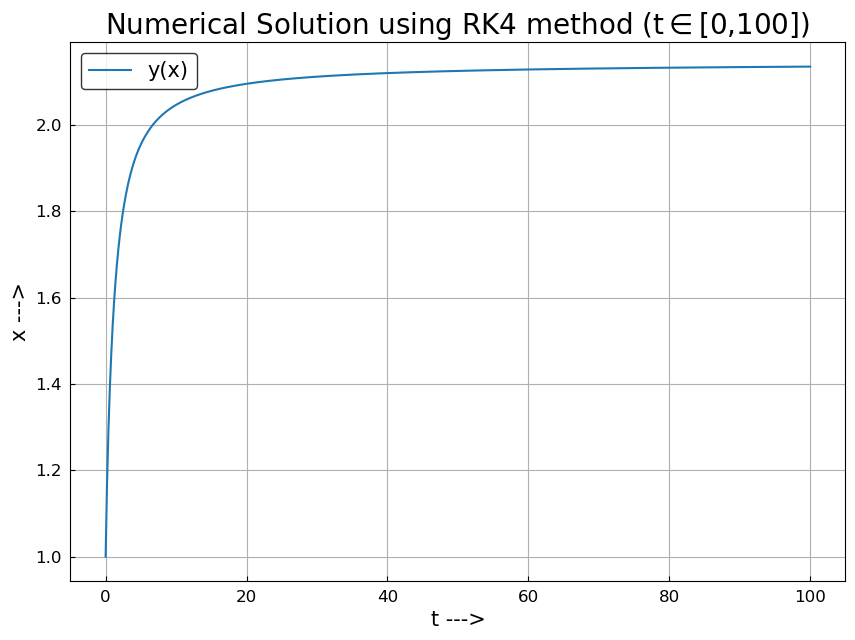

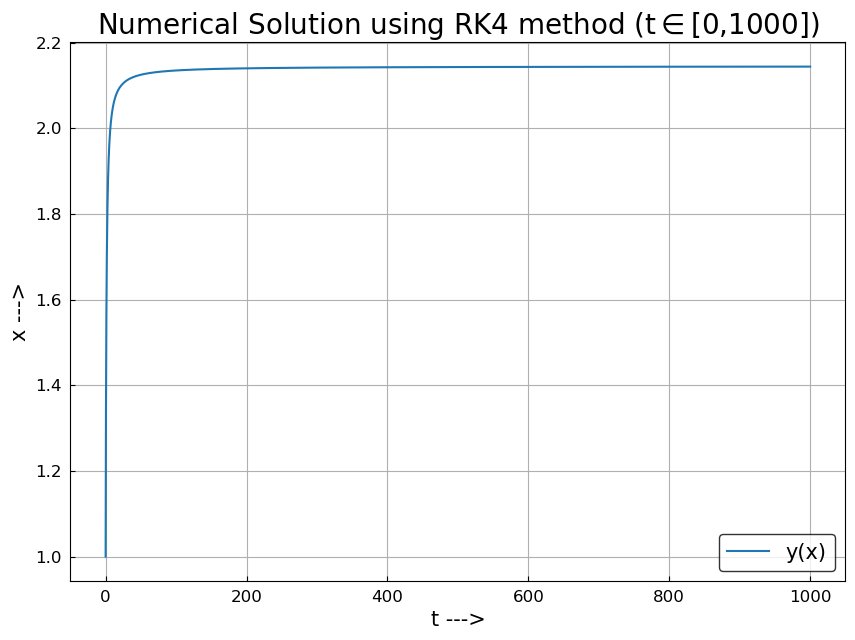

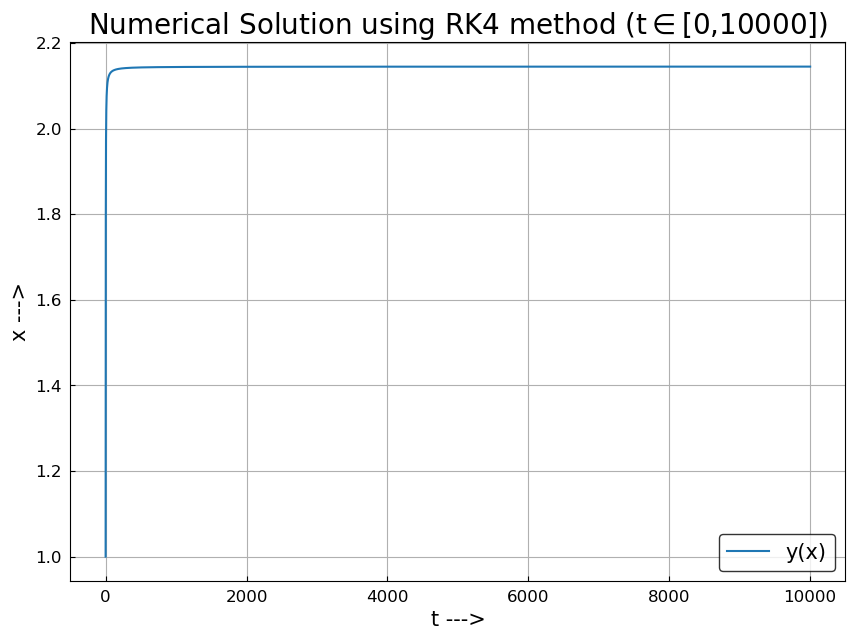

The value of the solution at t= 3.5*10^6 is:  [2.14471961]


In [25]:
#Question:11

import numpy as np
import matplotlib.pyplot as plt

#Defining the function f(t,x) for the given ODE
def f(t, x):
    return 1/(x**2 + t**2)

#Defining function for RK4 method
def rk4_method(f, t0, tf, x0, h):
    steps = int((tf - t0)/h)
    t_values = np.linspace(t0, tf, steps + 1)
    x_values = np.zeros((len(t_values), len([x0])))
    x_values[0] = x0

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        x = x_values[i - 1]
        
        k1 = h*f(t, x)
        k2 = h*f(t + 0.5*h, x + 0.5*k1)
        k3 = h*f(t + 0.5*h, x + 0.5*k2)
        k4 = h*f(t + h, x + k3)

        x_values[i] = x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t_values, x_values

#Given initial condition and t-range
t0 = 0
tf = (10)**2
x0 = 1

#Step-size
h = 0.1
#Initializing arrays to store the values of t and x
t_values = [t0]
x_values = [x0]

#Implementing RK4 method to solve the given ODE up to a large value
t_values, x_values = rk4_method(f, t0, tf, x0, h)

# Plot the solution
plt.figure(0)
plt.plot(t_values, x_values, label='y(x)')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('x --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title(r'Numerical Solution using RK4 method (t$\in$[0,100])',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

#Plotting for different-range
#Given initial condition and t-range
t0 = 0
tf = (10)**3
x0 = 1

#Step-size
h = 0.1
#Initializing arrays to store the values of t and x
t_values = [t0]
x_values = [x0]

#Implementing RK4 method to solve the given ODE up to a large value
t_values, x_values = rk4_method(f, t0, tf, x0, h)

# Plot the solution
plt.figure(1)
plt.plot(t_values, x_values, label='y(x)')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('x --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title(r'Numerical Solution using RK4 method (t$\in$[0,1000])',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

#Plotting for different-range
#Given initial condition and t-range
t0 = 0
tf = (10)**4
x0 = 1

#Step-size
h = 0.1
#Initializing arrays to store the values of t and x
t_values = [t0]
x_values = [x0]

#Implementing RK4 method to solve the given ODE up to a large value
t_values, x_values = rk4_method(f, t0, tf, x0, h)

# Plot the solution
plt.figure(2)
plt.plot(t_values, x_values, label='y(x)')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('x --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title(r'Numerical Solution using RK4 method (t$\in$[0,10000])',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()


"""As we can see, the solution saturates to a constant value at large values of 't'. Thus, the value of the solution at t = 3.5*10^6 is
just this saturated value."""
print('The value of the solution at t= 3.5*10^6 is: ', x_values[99999])

# Question:12

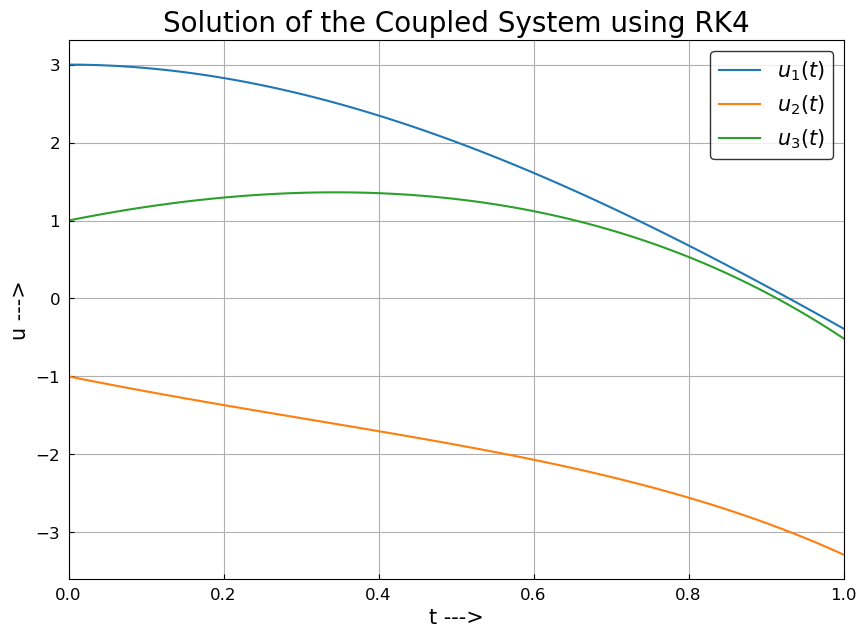

In [78]:
#Question:12

import numpy as np
import matplotlib.pyplot as plt

#Defining the given system of three coupled first-order ODEs
def ode_sys(t, u):
    u1, u2, u3 = u
    du1dt = u1 + 2*u2 - 2*u3 + np.exp(-t)
    du2dt = u2 + u3 - 2*np.exp(-t)
    du3dt = u1 + 2*u2 + np.exp(-t)
    return [du1dt, du2dt, du3dt]

#Given initial conditions
u0 = [3, -1, 1]                                      #Initial values of u1, u2, and u3

#Defining the t-range
t_range = np.linspace(0, 1, 100)

#Implementing the RK4 routine
def rk4(u, t, h):
    k1 = h*np.array(ode_sys(t, u))
    k2 = h*np.array(ode_sys(t + 0.5*h, u + 0.5*k1))
    k3 = h*np.array(ode_sys(t + 0.5*h, u + 0.5*k2))
    k4 = h*np.array(ode_sys(t + h, u + k3))
    return u + (k1 + 2*k2 + 2*k3 + k4) / 6

#Initializing the solution
u_sol = np.zeros((len(u0), len(t_range)))
u_sol[:, 0] = u0

#Step size
h = t_range[1] - t_range[0]  

#Solving the given system
for i in range(1, len(t_range)):
    u_sol[:, i] = rk4(u_sol[:, i-1], t_range[i-1], h)

# Plotting the solution
plt.plot(t_range, u_sol[0], label=r'$u_1(t)$')
plt.plot(t_range, u_sol[1], label=r'$u_2(t)$')
plt.plot(t_range, u_sol[2], label=r'$u_3(t)$')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('u --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Solution of the Coupled System using RK4',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(0,1)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()

# Question:14

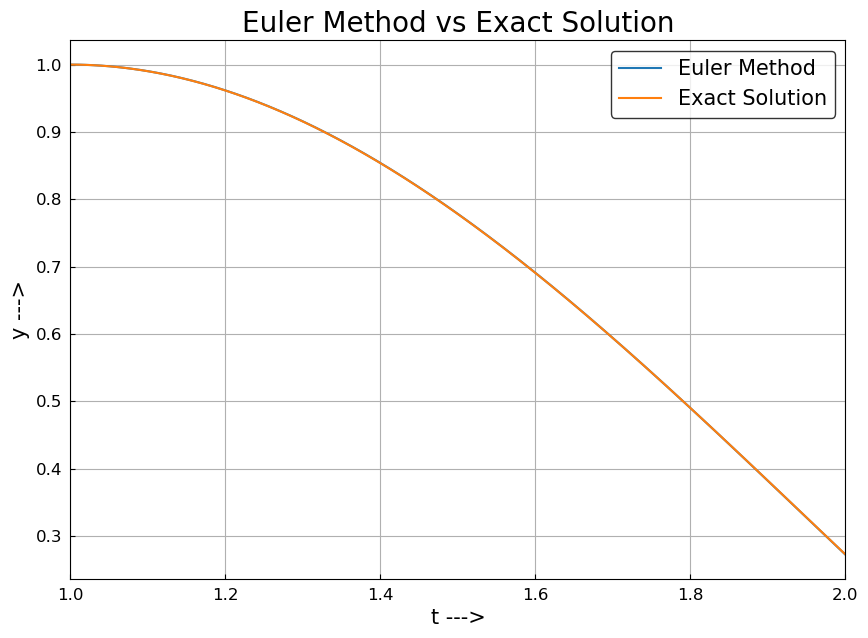

In [88]:
#Question:14

import numpy as np
import matplotlib.pyplot as plt

#Defining the function for given ODE
def ode(t, y, dydt):
    return t*np.log(t) - (2*y)/(t*t) + (2*dydt)/(t)

#Given initial conditions and t-range
t0 = 1 
tf = 2
y0 = 1  
dydt0 = 0

#Step-size and number of steps
h = 0.001
steps = int((tf - t0)/h)

#Initializing arrays to store the values of t, y, and dy/dt
t_values = np.zeros(steps + 1)
y_values = np.zeros(steps + 1)
dydt_values = np.zeros(steps + 1)

#Setting the initial values
t_values[0] = t0
y_values[0] = y0
dydt_values[0] = dydt0

#Implementing the Euler's method
for i in range(steps):
    dydt = dydt_values[i]
    d2ydt2 = ode(t_values[i], y_values[i], dydt)
    y_values[i+1] = y_values[i] + dydt * h
    dydt_values[i+1] = dydt_values[i] + d2ydt2 * h
    t_values[i+1] = t_values[i] + h

#Defining function for exact solution
def exact_sol(t):
    return (7*t)/4 + ((t**3)/2)*np.log(t) - (3/4)*(t**3)

#Data for plotting exact solution
t_data = np.linspace(1,2,100)
y_data = exact_sol(t_data)

#Plotting the numerical solution vs the exact solution
plt.plot(t_values, y_values, label='Euler Method')
plt.plot(t_data, y_data, label='Exact Solution')
plt.xlabel('t --->',rotation = 0, fontsize = 15 , labelpad = 4)  
plt.ylabel('y --->',rotation = 90, fontsize = 15 , labelpad = 4) 
plt.title('Euler Method vs Exact Solution',fontsize = 20)
plt.rcParams['figure.figsize'] = [10,7]
plt.tick_params(axis="y",direction="in", pad=6)
plt.xlim(1,2)
plt.tick_params(axis="x",direction="in", pad=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(edgecolor = 'black', fontsize=15)
plt.show()